In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as its
import function_pontius as fpt
import heatmap_cm as hmcm

# One CM that combines quantity disagreement rows for all maps (and columns in another one)

In [3]:
data = []
row_name = []

def heatmap_qd(map1, map2):
    """This function takes in two map names and returns the quantity disagreement for each land-use category.
    The returned values show for each class the percentage (relative to the whole map) of cells that map 1 
    predicted differently than map 2 for that class, with negative values meaning that map 2 predicted more of that category.
    """
    # Load in the maps and set up variables to process the maps
    map1_dir = 'E:/thesis_data/asc_2k/' + map1 + '.asc'
    map2_dir = 'E:/thesis_data/asc_2k/' + map2 + '.asc'    
    m1 = np.loadtxt(map1_dir, skiprows=6)
    m2 = np.loadtxt(map2_dir, skiprows=6)
    cm = fpt.conf_mat(m1, m2)
    # Set up dataframe and adjust for land-use categories that are removed from the df
    rows_cols = ['class' + str(i + 1) for i in range(28)]
    rows_cols.remove('class24')
    rows_cols.remove('class28')
    df = pd.DataFrame(data=cm, index=rows_cols, columns=rows_cols)
    # Create the pontius class and generate the cm matrix with additional info
    df_pont = hmcm.pontiPy(df)
    df_matrix = df_pont.matrix()
    df_matrix['RowDisagreement'] = pd.to_numeric(df_matrix['RowDisagreement'])
    # Assign dummy value to cell to prevent error warning
    df_matrix.loc['ColumnDisagreement', 'RowDisagreement'] = 0
    #Store disagreement
    rowdata = df_matrix.loc[:'class27', 'RowDisagreement']
    coldata = df_matrix.loc['ColumnDisagreement', :'class27']
    qd = rowdata - coldata
    # Format the data to filter out low data and round interesting outcomes
    for i, val in enumerate(qd):
        if val < 0.0001 and val > -0.0001 :
            qd[i] = 0
        else:
            qd[i] = qd[i].round(4)   
    # Create label for new df
    n1 = map1[3:]
    n2 = map2[3:]
    row_id = 'Map ' + n1 + ' & ' + n2
    return qd, row_id

In [4]:
# Create CM showing quantity disagreement for kappa representative maps
# Overal difference has same maps as kappa so no point 
kappa_data = []
kappa_row_name = []
kappa_maps = ['map359', 'map456', 'map541', 'map695', 'map1148', 'map1760', 'map1911']
iterator = its.combinations(kappa_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    kappa_data.append(dat)
    kappa_row_name.append(row)

df = pd.DataFrame(data=kappa_data, index=kappa_row_name)
df = df.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df = df.loc[:, (df != 0).any(axis=0)]

In [5]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(25, 25))
hm_kappa = sns.heatmap(df, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .4})
_ = hm_kappa.set_xticklabels(hm_kappa.get_xticklabels(), rotation=60)
_ = hm_kappa.set_yticklabels(hm_kappa.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Kappa', fontsize=20)
cbar = hm_kappa.collections[0].colorbar
cbar.set_label(label='Percentage Difference In Land-Use Category Assignment', fontsize=12)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/kappa.png', format='png', bbox_inches="tight")
#plt.close()

In [6]:
# Create CM showing quantity disagreement for oa representative maps
oa_data = []
oa_row_name = []
oa_maps = ['map10', 'map359', 'map456', 'map541', 'map695', 'map696', 'map1911']
iterator = its.combinations(oa_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    oa_data.append(dat)
    oa_row_name.append(row)

df2 = pd.DataFrame(data=oa_data, index=oa_row_name)
df2 = df2.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df2 = df2.loc[:, (df2 != 0).any(axis=0)]

In [7]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(25, 25))
hm_oa = sns.heatmap(df2, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .3})
_ = hm_oa.set_xticklabels(hm_oa.get_xticklabels(), rotation=50)
_ = hm_oa.set_yticklabels(hm_oa.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Overall Accuracy', fontsize=20)
cbar = hm_oa.collections[0].colorbar
cbar.set_label(label='Percentage Difference In Land-Use Category Assignment', fontsize=16)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/oa.png', format='png', bbox_inches="tight")
#plt.close()

In [8]:
# Create CM showing quantity disagreement for shannon's representative maps
shan_data = []
shan_row_name = []
shan_maps = ['map61', 'map1248', 'map1454', 'map1457']
iterator = its.combinations(shan_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    shan_data.append(dat)
    shan_row_name.append(row)

df3 = pd.DataFrame(data=shan_data, index=shan_row_name)
df3 = df3.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df3 = df3.loc[:, (df3 != 0).any(axis=0)]

In [9]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(17, 12))
hm_shan = sns.heatmap(df3, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .5})
_ = hm_shan.set_xticklabels(hm_shan.get_xticklabels(), rotation=50)
_ = hm_shan.set_yticklabels(hm_shan.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Shannon\'s Diversity Index', fontsize=20)
cbar = hm_shan.collections[0].colorbar
cbar.set_label(label='Percentage Difference In Land-Use Category Assignment', fontsize=12)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/shan.png', format='png', bbox_inches="tight")
#plt.close()

In [12]:
# Create CM showing quantity disagreement for simpson's representative maps
simp_data = []
simp_row_name = []
simp_maps = ['map65', 'map857', 'map1448', 'map1784', 'map1830']
iterator = its.combinations(simp_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    simp_data.append(dat)
    simp_row_name.append(row)
    
df4 = pd.DataFrame(data=simp_data, index=simp_row_name)
df4 = df4.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df4 = df4.loc[:, (df4 != 0).any(axis=0)]

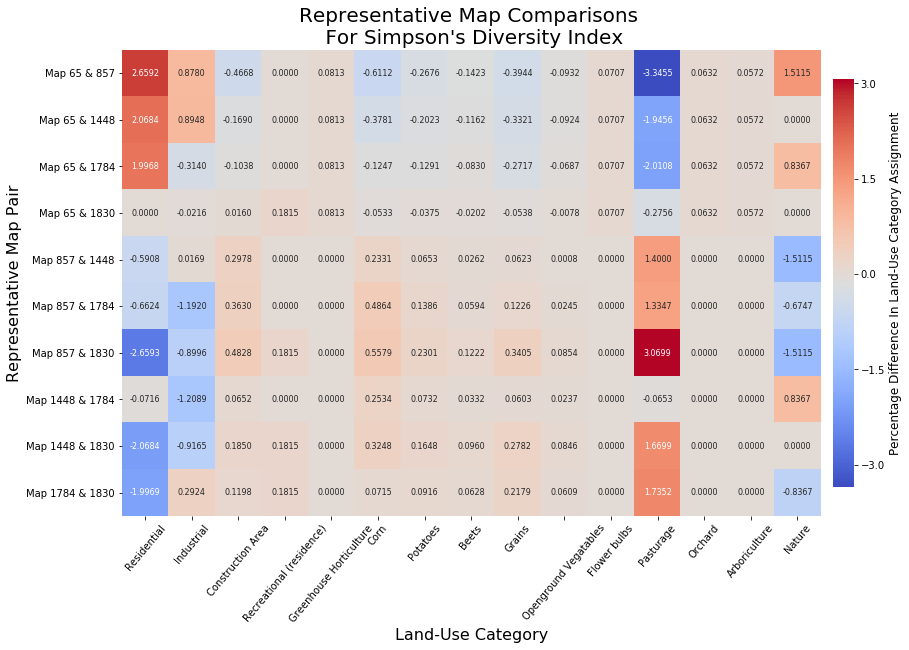

In [13]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(15, 15))
hm_simp = sns.heatmap(df4, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .5})
_ = hm_simp.set_xticklabels(hm_simp.get_xticklabels(), rotation=50)
_ = hm_simp.set_yticklabels(hm_simp.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Simpson\'s Diversity Index', fontsize=20)
cbar = hm_simp.collections[0].colorbar
cbar.set_label(label='Percentage Difference In Land-Use Category Assignment', fontsize=12)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/simp.png', format='png', bbox_inches="tight")
#plt.close()

In [14]:
# Create CM showing quantity disagreement for oad representative maps
oad_data = []
oad_row_name = []
oad_maps = ['map263', 'map453', 'map678', 'map1760', 'map1852', 'map1918']
iterator = its.combinations(oad_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    oad_data.append(dat)
    oad_row_name.append(row)
    
df5 = pd.DataFrame(data=oad_data, index=oad_row_name)
df5 = df5.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df5 = df5.loc[:, (df5 != 0).any(axis=0)]

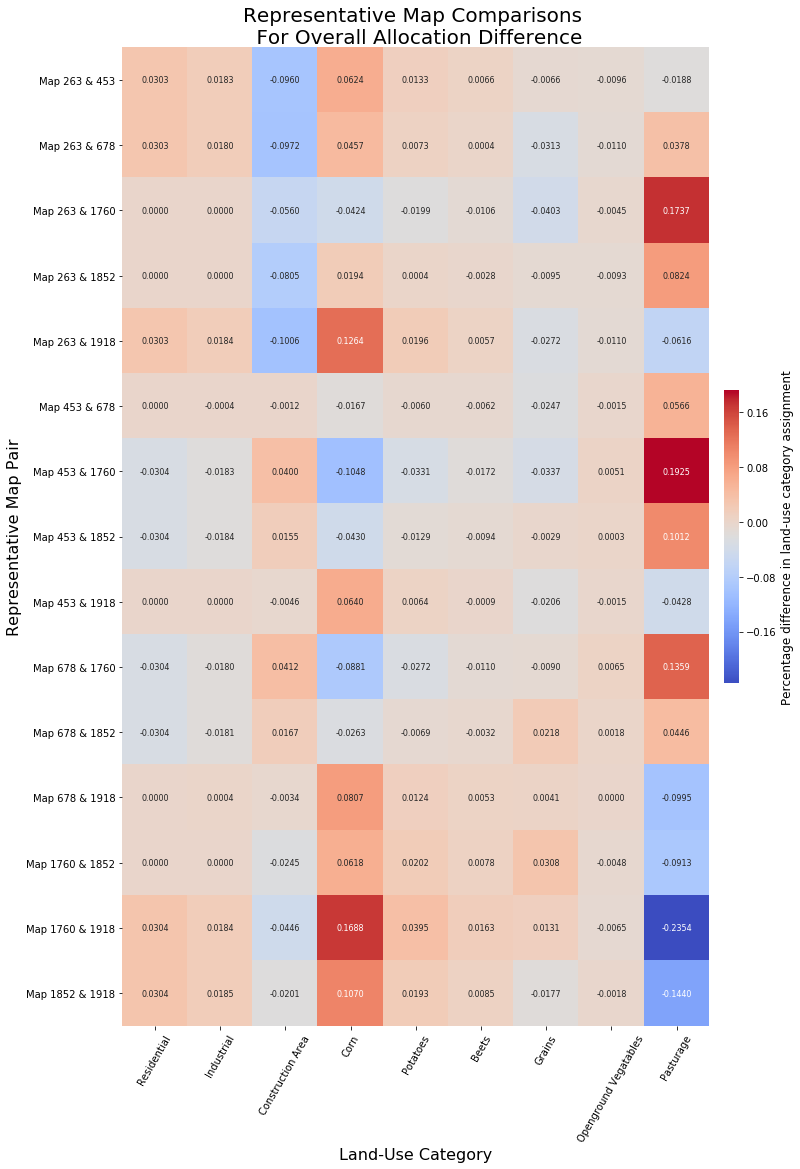

In [15]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(18, 18))
hm_oad = sns.heatmap(df5, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .3})
_ = hm_oad.set_xticklabels(hm_oad.get_xticklabels(), rotation=60)
_ = hm_oad.set_yticklabels(hm_oad.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Overall Allocation Difference', fontsize=20, pad=1)
cbar = hm_oad.collections[0].colorbar
cbar.set_label(label='Percentage difference in land-use category assignment', fontsize=12)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/oad.png', format='png', bbox_inches="tight")
#plt.close()

In [16]:
# Create CM showing quantity disagreement for oqd representative maps
oqd_data = []
oqd_row_name = []
oqd_maps = ['map1057', 'map1472', 'map1833', 'map1978']
iterator = its.combinations(oqd_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    oqd_data.append(dat)
    oqd_row_name.append(row)
    
df6 = pd.DataFrame(data=oqd_data, index=oqd_row_name)
df6 = df6.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df6 = df6.loc[:, (df6 != 0).any(axis=0)]

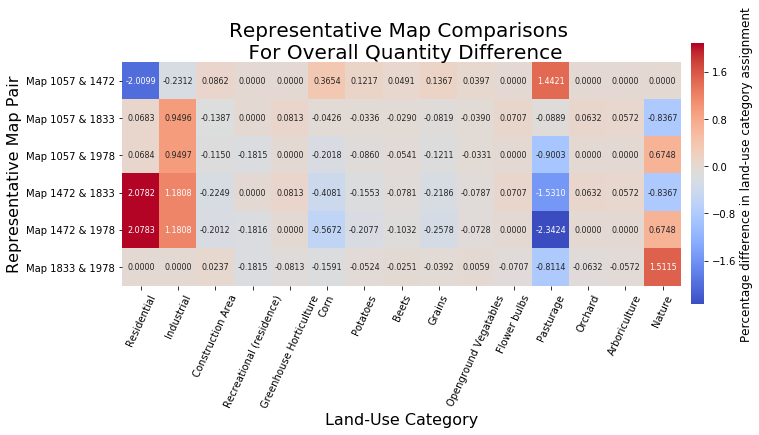

In [17]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(12, 12))
hm_oqd = sns.heatmap(df6, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .4})
_ = hm_oqd.set_xticklabels(hm_oqd.get_xticklabels(), rotation=65)
_ = hm_oqd.set_yticklabels(hm_oqd.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Overall Quantity Difference', fontsize=20, pad=1)
cbar = hm_oqd.collections[0].colorbar
cbar.set_label(label='Percentage difference in land-use category assignment', fontsize=12)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/oqd.png', format='png', bbox_inches="tight")
#plt.close()

In [18]:
# Create CM showing quantity disagreement for tca4 representative maps
tca4_data = []
tca4_row_name = []
tca4_maps = ['map217', 'map332', 'map604']
iterator = its.combinations(tca4_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    tca4_data.append(dat)
    tca4_row_name.append(row)
    
df7 = pd.DataFrame(data=tca4_data, index=tca4_row_name)
df7 = df7.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df7 = df7.loc[:, (df7 != 0).any(axis=0)]

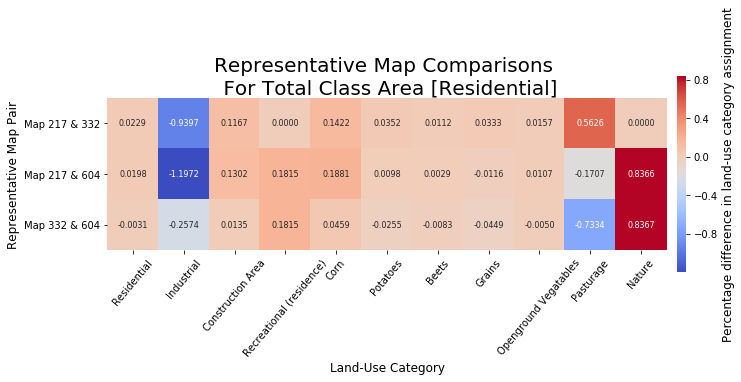

In [30]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(12, 12))
hm_tca4 = sns.heatmap(df7, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .3})
_ = hm_tca4.set_xticklabels(hm_tca4.get_xticklabels(), rotation=50)
_ = hm_tca4.set_yticklabels(hm_tca4.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=12)
plt.xlabel('Land-Use Category', fontsize=12) 
plt.title('Representative Map Comparisons \n For Total Class Area [Residential]', fontsize=20, pad=1)
cbar = hm_tca4.collections[0].colorbar
cbar.set_label(label='Percentage difference in land-use category assignment', fontsize=12)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/tca4.png', format='png', bbox_inches="tight")
#plt.close()

In [20]:
# Create CM showing quantity disagreement for tca4 representative maps
pland4_data = []
pland4_row_name = []
pland4_maps = ['map264', 'map1422', 'map1877']
iterator = its.combinations(pland4_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    pland4_data.append(dat)
    pland4_row_name.append(row)
    
df8 = pd.DataFrame(data=pland4_data, index=pland4_row_name)
df8 = df8.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df8 = df8.loc[:, (df8 != 0).any(axis=0)]

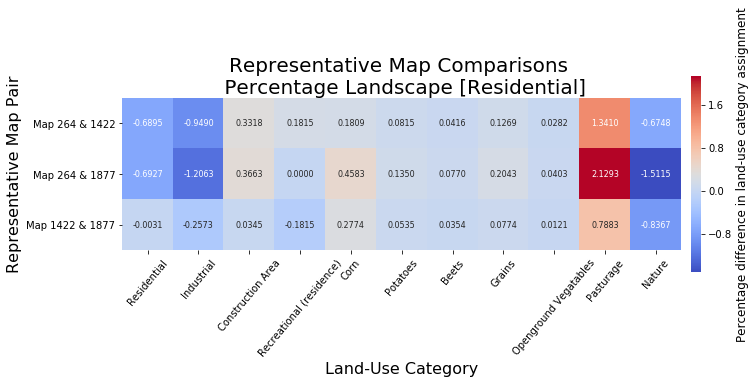

In [21]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(12, 12))
hm_pland4 = sns.heatmap(df8, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .3})
_ = hm_pland4.set_xticklabels(hm_pland4.get_xticklabels(), rotation=50)
_ = hm_pland4.set_yticklabels(hm_pland4.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n Percentage Landscape [Residential]', fontsize=20, pad=1)
cbar = hm_pland4.collections[0].colorbar
cbar.set_label(label='Percentage difference in land-use category assignment', fontsize=12)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/pland4.png', format='png', bbox_inches="tight")
#plt.close()

In [22]:
# Create CM showing quantity disagreement for tca4 representative maps
tca14_data = []
tca14_row_name = []
tca14_maps = ['map246', 'map296', 'map325', 'map825', 'map1612']
iterator = its.combinations(tca14_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    tca14_data.append(dat)
    tca14_row_name.append(row)
    
df9 = pd.DataFrame(data=tca14_data, index=tca14_row_name)
df9 = df9.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df9 = df9.loc[:, (df9 != 0).any(axis=0)]

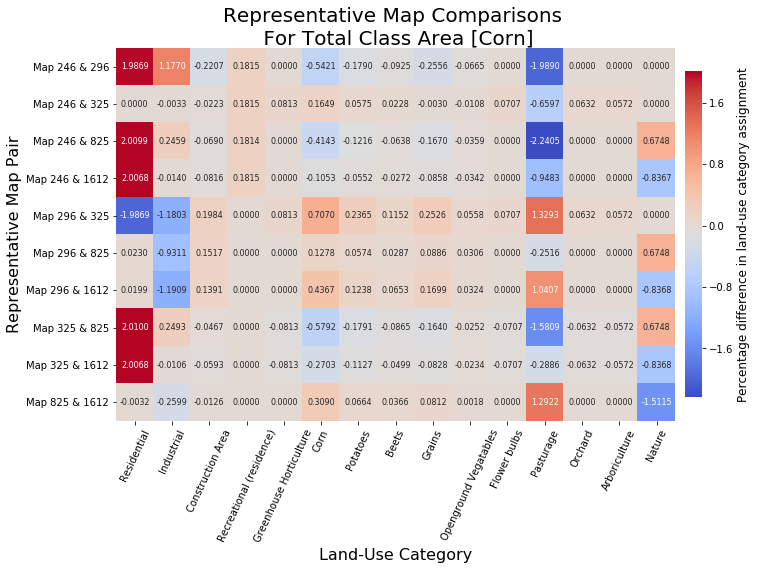

In [23]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(12, 12))
hm_tca14 = sns.heatmap(df9, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .5})
_ = hm_tca14.set_xticklabels(hm_tca14.get_xticklabels(), rotation=65)
_ = hm_tca14.set_yticklabels(hm_tca14.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Total Class Area [Corn]', fontsize=20, pad=1)
cbar = hm_tca14.collections[0].colorbar
cbar.set_label(label='Percentage difference in land-use category assignment', fontsize=12)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/tca14.png', format='png', bbox_inches="tight")
#plt.close()

In [24]:
# Create CM showing quantity disagreement for tca4 representative maps
pland14_data = []
pland14_row_name = []
pland14_maps = ['map246', 'map325', 'map564', 'map704', 'map843']
iterator = its.combinations(pland14_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    pland14_data.append(dat)
    pland14_row_name.append(row)
    
df10 = pd.DataFrame(data=pland14_data, index=pland14_row_name)
df10 = df10.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df10 = df10.loc[:, (df10 != 0).any(axis=0)]

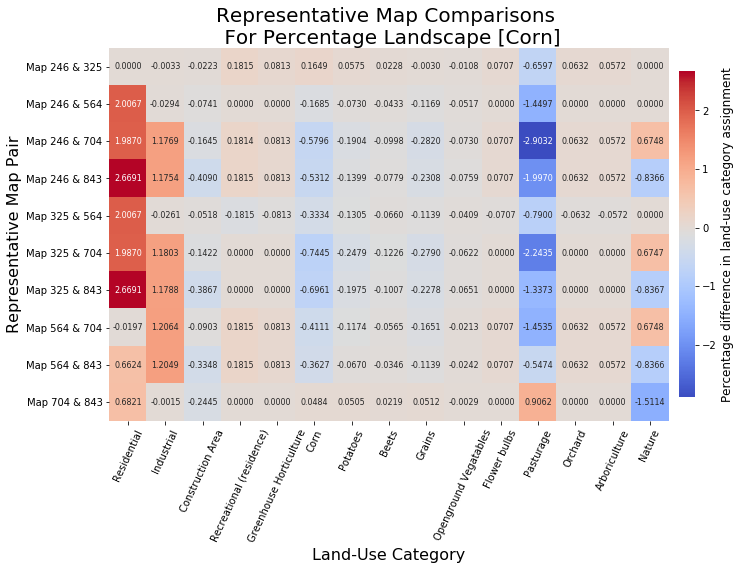

In [25]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(12, 12))
hm_pland14 = sns.heatmap(df10, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .5})
_ = hm_pland14.set_xticklabels(hm_pland14.get_xticklabels(), rotation=65)
_ = hm_pland14.set_yticklabels(hm_pland14.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Percentage Landscape [Corn]', fontsize=20, pad=1)
cbar = hm_pland14.collections[0].colorbar
cbar.set_label(label='Percentage difference in land-use category assignment', fontsize=12)
plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/pland14.png', format='png', bbox_inches="tight")
#plt.close()

In [26]:
# Create CM showing quantity disagreement for tca4 representative maps
# TCA22 and PLAND 22 have the same representative maps so only TCA will be done for both of them
tca22_data = []
tca22_row_name = []
tca22_maps = ['map0', 'map8', 'map35']
iterator = its.combinations(tca22_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    tca22_data.append(dat)
    tca22_row_name.append(row)
    
df11 = pd.DataFrame(data=tca22_data, index=tca22_row_name)
df11 = df11.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df11 = df11.loc[:, (df11 != 0).any(axis=0)]

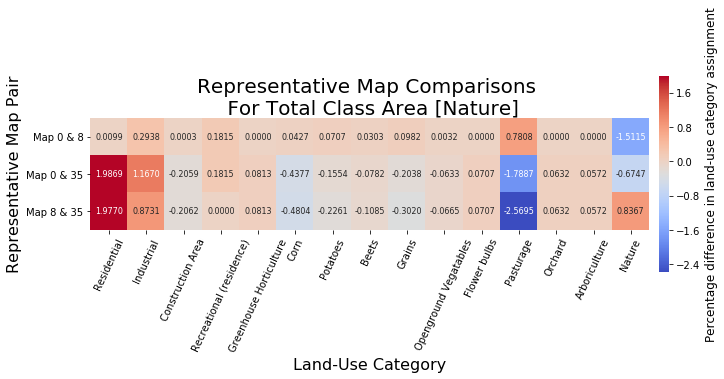

In [27]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(12, 12))
hm_tca22 = sns.heatmap(df11, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .3})
_ = hm_tca22.set_xticklabels(hm_tca22.get_xticklabels(), rotation=65)
_ = hm_tca22.set_yticklabels(hm_tca22.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Total Class Area [Nature]', fontsize=20, pad=1)
cbar = hm_tca22.collections[0].colorbar
cbar.set_label(label='Percentage difference in land-use category assignment', fontsize=12)

plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/tca22.png', format='png', bbox_inches="tight")
#plt.close()

In [28]:
# Create CM showing quantity disagreement for qd22 representative maps
qd22_data = []
qd22_row_name = []
qd22_maps = ['map0', 'map1', 'map8']
iterator = its.combinations(qd22_maps, 2)

for dat, row in its.starmap(heatmap_qd, iterator):
    qd22_data.append(dat)
    qd22_row_name.append(row)
    
df12 = pd.DataFrame(data=qd22_data, index=qd22_row_name)
df12 = df12.rename(columns={'class1':'Railway', 'class2':'Road', 'class3':'Airport', 'class4':'Residential', 'class5':'Industrial', 'class6':'Facillities', 'class7':'Ports' \
        ,'class8':'Construction Area', 'class9':'Semi hardened area', 'class10':'Recreational (daily)', 'class11':'Recreational (residence)' \
       , 'class12':'Grass (residential area)', 'class13':'Greenhouse Horticulture', 'class14':'Corn', 'class15':'Potatoes', 'class16':'Beets' \
        , 'class17':'Grains', 'class18':'Openground Vegatables', 'class19':'Flower bulbs', 'class20':'Pasturage' \
       , 'class21':'Orchard', 'class22':'Arboriculture', 'class23':'Nature', 'class25':'Large Fresh Water', 'class26':'Rivers', 'class27':'Misc Waters'}) 
df12 = df12.loc[:, (df12 != 0).any(axis=0)]

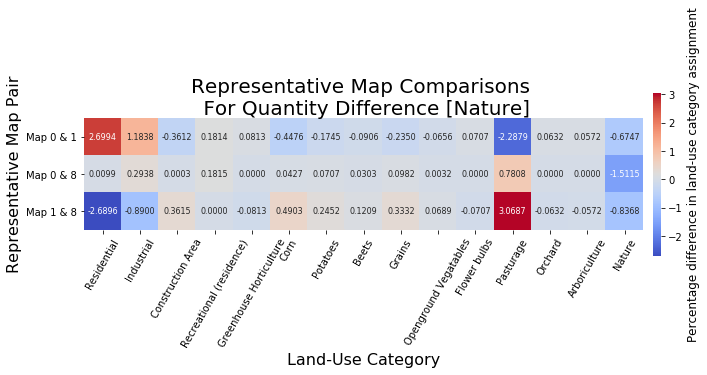

In [29]:
# Create seaborn heatmap and save to disk
plt.figure(figsize=(12, 12))
hm_qd22 = sns.heatmap(df12, cmap='coolwarm', fmt=".4f", annot=True, square=True, annot_kws={"size": 8} \
                , cbar_kws={'label': 'Percentage difference in land-use category assignment','pad': 0.015, 'shrink': .25})
_ = hm_qd22.set_xticklabels(hm_qd22.get_xticklabels(), rotation=60)
_ = hm_qd22.set_yticklabels(hm_qd22.get_yticklabels(), rotation=0)
plt.ylabel('Representative Map Pair', fontsize=16)
plt.xlabel('Land-Use Category', fontsize=16) 
plt.title('Representative Map Comparisons \n For Quantity Difference [Nature]', fontsize=20, pad=1)
cbar = hm_qd22.collections[0].colorbar
cbar.set_label(label='Percentage difference in land-use category assignment', fontsize=12)
plt.savefig('E:/thesis_images/representative_maps/cm_figures_combinations/qd22.png', format='png', bbox_inches="tight")
#plt.close()